# Dialogues in the comedy TV show Seinfeld: A show about nothing!

**This project analyses my favourite comedy TV show Seinfeld. I created this project to practice exploratory data analysis, visualization and natural language processing of dialogues in Seinfeld.**

The data consists of 54616 rows and 6 columns.
Column information:
1. Unnamed: 0 - index column
2. Character - name of the character in the TV show
3. Dialogue - quotes from show's dialogues
4. EpisodeNo - episode number
5. SEID - Season and episode ID (i.e. S01E01 denotes 1st episode of the 1st season)
6. Season - number of show's season

### Load packages required for the project

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
import warnings #Ignore warnings
warnings.filterwarnings('ignore')
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [79]:
# Load data and show the first 10 rows 
df = pd.read_csv('~/Desktop/scripts.csv', index_col=0)
df.head(10)

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,GEORGE,Are you through?,1.0,S01E01,1.0
3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0
5,JERRY,"Oh, you dont recall?",1.0,S01E01,1.0
6,GEORGE,"(on an imaginary microphone) Uh, no, not at th...",1.0,S01E01,1.0
7,JERRY,"Well, senator, Id just like to know, what you ...",1.0,S01E01,1.0
8,CLAIRE,Mr. Seinfeld. Mr. Costanza.,1.0,S01E01,1.0
9,GEORGE,"Are, are you sure this is decaf? Wheres the or...",1.0,S01E01,1.0


We can tell that our data is structured in a way that every character's line represents a row (instance) and columns are features of this instance. 

In [80]:
print(df.shape) #There are 6 columns and 54616 rows

(54616, 5)


In [81]:
print(df.columns) #Column names

Index(['Character', 'Dialogue', 'EpisodeNo', 'SEID', 'Season'], dtype='object')



**Let's find _missing values_ and _clean our data_**

In [82]:
# Information about our data frame, type of variables and missing values
# We can see that column Dialogue has missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54616 entries, 0 to 54615
Data columns (total 5 columns):
Character    54616 non-null object
Dialogue     54606 non-null object
EpisodeNo    54616 non-null float64
SEID         54616 non-null object
Season       54616 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [83]:
#find missing values in Dialogue column
df[df.isnull().any(axis=1)]

,Character,Dialogue,EpisodeNo,SEID,Season
13529,** Pies - Just in case you did not know what t...,NaN,7.0,S04E07,4.0
14938,"[On the bright side, Kramer and George arrive ...",NaN,12.0,S04E12,4.0
18353,(The show begins. There are three different se...,NaN,24.0,S04E24,4.0
18354,(Jerry's doing his stand-up routine at a comed...,NaN,24.0,S04E24,4.0
18355,"We see the title 'Jerry', then, sitting at the...",NaN,24.0,S04E24,4.0
42939,Definitions of several items in the Chicken Ro...,NaN,8.0,S08E08,8.0
45847,HAL,NaN,18.0,S08E18,8.0
49651,Notice,NaN,8.0,S09E08,9.0
50013,The definition of Sari or Saree is,NaN,8.0,S09E08,9.0
53142,MONTAGE,NaN,18.0,S09E18,9.0


We will now create a new data frame df and assign the old one to it. At the same time, we will drop all values in 10 rows which contain no dialogue. Lastly, we will check the info again to make sure all rows with missing values are deleted. 

In [84]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54606 entries, 0 to 54615
Data columns (total 5 columns):
Character    54606 non-null object
Dialogue     54606 non-null object
EpisodeNo    54606 non-null float64
SEID         54606 non-null object
Season       54606 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [85]:
#basic statistical characteristics of numerical features
df.describe() 

,EpisodeNo,Season
count,54606.000000,54606.000000
mean,11.360052,5.677618
std,6.756841,2.243924
min,1.000000,1.000000
25%,5.000000,4.000000
50%,11.000000,6.000000
75%,17.000000,8.000000
max,24.000000,9.000000


Seinfeld series ran for 9 seasons. Let's check whether our dataset contains all seasons of the show.

In [86]:
df['Season'].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [87]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

We can also check the distribution of dialogue lines per season by plotting it.

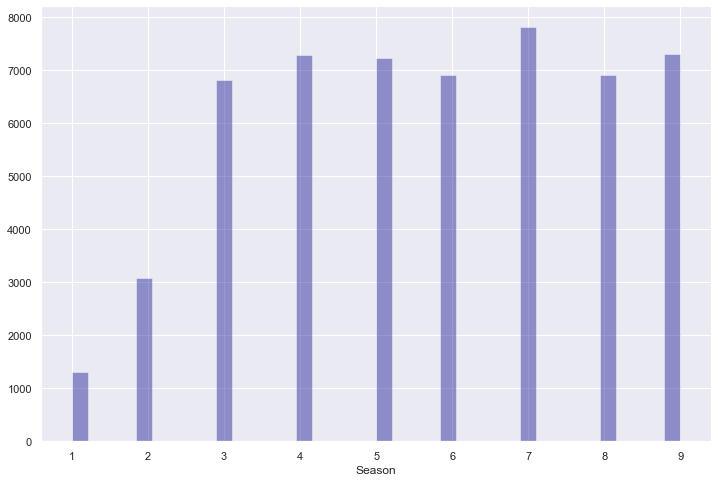

In [88]:
sns.set()
sns.distplot(df['Season'], kde=False, color = 'darkblue')

**Season 7** has the biggest number of lines. **Season 1** has the smallest number but it is expected given the number of episodes per season. We can also check the number of episodes!

In [89]:
episode_count = df.groupby('Season')['SEID'].aggregate(['count', 'unique'])
episode_count['episodes'] = episode_count['unique'].apply(lambda x: len(x))
episode_count[['count', 'episodes']]

,count,episodes
Season,,
1.0,1308,4
2.0,3077,12
3.0,6811,23
4.0,7285,24
5.0,7228,21
6.0,6903,22
7.0,7806,24
8.0,6895,22
9.0,7293,21


**Season 7** has the highest episode_count == 24 and **Season 1** the lowest == 4. However, if we look at Seinfeld's wikipedia page [https://en.wikipedia.org/wiki/Seinfeld#Episodes] we can notice that Season 1 has 5 episodes and not 4. By looking at the dataset again, we can notice that both Pilot episodes are merged and labeled as the same episode 'S01E01'. Now, we need to find the ending of the first pilot within S01E01 and divide them into two separate episodes. We can make our lives easier by dividing the total number of lines with the number of episodes and get an approximate line per episode measure.

In [90]:
#Number of lines of dialogue per episode
episode_count['count']/episode_count['episodes']

Season
1.0    327.000000
2.0    256.416667
3.0    296.130435
4.0    303.541667
5.0    344.190476
6.0    313.772727
7.0    325.250000
8.0    313.409091
9.0    347.285714
dtype: float64

We can see that season 1 has approximately 327 lines per episode. It is obvious that we should look in the range of 250 to 350 lines in the first episode of the first season to find the ending of the first Pilot episode and the beginning of the second one which is nested in it.

In [91]:
df[250:350] 

,Character,Dialogue,EpisodeNo,SEID,Season
250,ELAINE,Cmon lets go...,1.0,S01E01,1.0
251,JERRY,Was I supposed to bring something?,1.0,S01E01,1.0
252,ELAINE,You could have.,1.0,S01E01,1.0
253,JERRY,I met her one time...,1.0,S01E01,1.0
254,ELAINE,It is not necessary.,1.0,S01E01,1.0
...,...,...,...,...,...
345,HELEN,I know what it was.,1.0,S01E01,1.0
346,JERRY,You dont know what it was.,1.0,S01E01,1.0
347,HELEN,"So, what was it?",1.0,S01E01,1.0
348,JERRY,"Well, we fight a lot for some reason.",1.0,S01E01,1.0


Being a fan of the TV show, I notice that the second pilot has already started. We need to look in the range between 200 and 250.

In [92]:
df[200:250]

,Character,Dialogue,EpisodeNo,SEID,Season
200,LAURA,(to the phone) Hello?... Hi!... No no it was g...,1.0,S01E01,1.0
201,JERRY,(not excited) Youre engaged?,1.0,S01E01,1.0
202,LAURA,"You, you really have no idea what its like unt...",1.0,S01E01,1.0
203,JERRY,Youre engaged?,1.0,S01E01,1.0
204,LAURA,"You know, I cant believe it myself sometimes. ...",1.0,S01E01,1.0
205,JERRY,(matter-of-factly) Youre engaged.,1.0,S01E01,1.0
206,LAURA,"Yeah, yeah, hes a great guy...",1.0,S01E01,1.0
207,JERRY,Yeah.,1.0,S01E01,1.0
208,LAURA,"Youd really like him, you know, I cant wait to...",1.0,S01E01,1.0
209,JERRY,Me too!,1.0,S01E01,1.0


Jerry's monologue about not understanding women ends the first pilot at the line 210. Hence we need to label first 210 differently to separate the two pilot episodes.

In [93]:
df[0:211]['SEID'] = 'Pilot 1' #Remember that 211 is not included in the range

# Data Visualisation

## Plot number of lines per character

Define the color palette and assign it to variable col.

Define the function plot_lines which will plot the most frequent 9 characters in the TV show, by the number of lines. 

In [94]:
col = sns.color_palette("Paired", 9)
def plot_lines(season = None, episode = None, top_n = 9):
    filtered_scripts = df
    if season:
        filtered_scripts = filtered_scripts[filtered_scripts['Season'] == season]
    if episode:
        filtered_scripts = filtered_scripts[filtered_scripts['SEID'] == episode]
    filtered_scripts['Character'].value_counts().head(top_n).plot(kind = 'bar', color=col, title = 'Number of lines per character', figsize=(16,10))

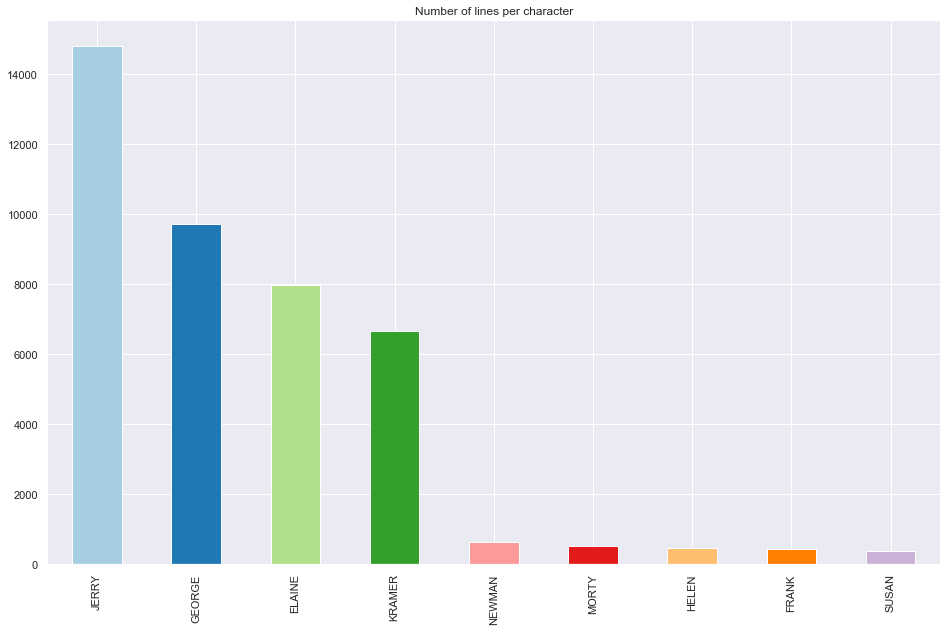

In [95]:
sns.set()
plot_lines()

### We are going to zoom in on the main four characters using Bokeh interactive plotting

In [96]:
line_count = df['Character'].value_counts().head(7)
line_count
characters = ['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'NEWMAN', 'MORTY', 'HELEN']
characters

['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'NEWMAN', 'MORTY', 'HELEN']

In [97]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import brewer
colors = brewer["Dark2"][len(characters)]

output_notebook()

p = figure(x_range=characters, plot_height=600, plot_width=700,
           title="Number of lines in the script per main character", toolbar_location=None, tools="")

p.vbar(x=characters, top=line_count, width=0.9, color = colors)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

# Text preprocessing 

In [98]:
#Make all strings in the column Dialogue lowercase 
df["text_lower"] = df["Dialogue"].str.lower()
df.head()

,Character,Dialogue,EpisodeNo,SEID,Season,text_lower
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b..."
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall..."


### We can also drop all the punctuation and stopwords
Stopwords are words in English language that carry no meaning for the computer, but are essential for human interaction. The next cell will list some stopwords.

In [99]:
#remove punctuation
import string 

punctuation = string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation))

df["no_punctuation"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...


In [100]:
#Note: you might need to download some packages from nltk, otherwise you'll get an error here
#If you get an error here, uncomment the following two lines to download it
#import nltk
#nltk.download()
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [101]:
#Now we remove the stopwords
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopwords])

df["no_stop_words"] = df["no_punctuation"].apply(lambda text: remove_stopwords(text))
df.head()

,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation,no_stop_words
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...,know know outand one single enjoyable experien...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...,pointing georges shirt see button worst possib...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through,
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy,course try buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...,yes purple liked dont actually recall consider...


### Find the most common words in the Seinfeld script
The cell below imports Counter and looks for the most frequent words

In [102]:
from collections import Counter
cnt = Counter()
for text in df["no_stop_words"].values:
    for word in text.split():
        cnt[word] += 1
        
most_common_words = cnt.most_common(10)
most_common_words

[('im', 4267),
 ('know', 4176),
 ('oh', 4043),
 ('well', 3978),
 ('yeah', 3783),
 ('dont', 3545),
 ('like', 2807),
 ('jerry', 2651),
 ('get', 2598),
 ('hey', 2396)]

In [103]:
#Let's plot the most common words
c=dict(most_common_words)
key=list(c.keys())
value=list(c.values())

output_notebook()

p = figure(x_range=key, plot_height=550, plot_width=550,
           title="The most frequent words in the script", toolbar_location=None, tools="")

p.vbar(x=key, top=value, width=0.9, color = ['blue', 'red', 'green', 'wheat', 'yellow', 'magenta', 'black', 'navy', 'lightblue', 'silver'])

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

In [104]:
#Let's find the most common 10 words and remove them

frequentwords = set([w for (w, wc) in cnt.most_common(10)])
print(frequentwords)
def remove_freqwords(text):
    """remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in frequentwords])

df["no_stopwords_reduced"] = df["no_stop_words"].apply(lambda text: remove_freqwords(text))
df.head()

{'im', 'know', 'hey', 'jerry', 'get', 'yeah', 'well', 'like', 'dont', 'oh'}


,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation,no_stop_words,no_stopwords_reduced
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...,know know outand one single enjoyable experien...,outand one single enjoyable experiences life p...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through,,
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy,course try buy,course try buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...,yes purple liked dont actually recall consider...,yes purple liked actually recall considering b...


In [105]:
#We now find the 10 least used words and remove them
n_rare_words = 10
rarewords = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
print(rarewords)
def remove_rarewords(text):
    """remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in rarewords])

df["no_stopwords_extra_reduced"] = df["no_stopwords_reduced"].apply(lambda text: remove_rarewords(text))
df.head()

{'doolittle', 'forsir', 'contemplate', 'lockdown', 'shiv', 'birdie', 'weightlifting', 'nomans', 'oooooo', 'adjourned'}


,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation,no_stop_words,no_stopwords_reduced,no_stopwords_extra_reduced
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...,know know outand one single enjoyable experien...,outand one single enjoyable experiences life p...,outand one single enjoyable experiences life p...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through,,,
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy,course try buy,course try buy,course try buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...,yes purple liked dont actually recall consider...,yes purple liked actually recall considering b...,yes purple liked actually recall considering b...


### Stemming
Stemming is a process of reducing the word to their root. For instance consulting, consultant, consultants and consulted all have the same stem 'consult'. It makes analysis much more clear and easier to keep track of many variations of the same word. 

In [106]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["Dialogue"].apply(lambda text: stem_words(text))
df.head()

,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation,no_stop_words,no_stopwords_reduced,no_stopwords_extra_reduced,text_stemmed
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...,know know outand one single enjoyable experien...,outand one single enjoyable experiences life p...,outand one single enjoyable experiences life p...,Do you know what thi is all about? Do you know...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...,"(point at georg shirt) see, to me, that button..."
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through,,,,are you through?
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy,course try buy,course try buy,course try buy,"you do of cours tri on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...,yes purple liked dont actually recall consider...,yes purple liked actually recall considering b...,yes purple liked actually recall considering b...,"yes, it wa purple, I like it, I dont actual re..."


### Lemmatization
You may notice that the process of stemming made some mistakes. Instead of try on, it returned tri. Instead of was it returned wa, and so on. We can use lemmatization instead of stemming, which reduces the words to their 'lemma'. 

In [107]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["final_lemmatized"] = df["no_stopwords_extra_reduced"].apply(lambda text: lemmatize_words(text))
df.head()

,Character,Dialogue,EpisodeNo,SEID,Season,text_lower,no_punctuation,no_stop_words,no_stopwords_reduced,no_stopwords_extra_reduced,text_stemmed,final_lemmatized
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,do you know what this is all about? do you kno...,do you know what this is all about do you know...,know know outand one single enjoyable experien...,outand one single enjoyable experiences life p...,outand one single enjoyable experiences life p...,Do you know what thi is all about? Do you know...,outand one single enjoyable experience life pe...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,"(pointing at georges shirt) see, to me, that b...",pointing at georges shirt see to me that butto...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...,pointing georges shirt see button worst possib...,"(point at georg shirt) see, to me, that button...",point george shirt see button bad possible spo...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,are you through?,are you through,,,,are you through?,
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,"you do of course try on, when you buy?",you do of course try on when you buy,course try buy,course try buy,course try buy,"you do of cours tri on, when you buy?",course try buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,"yes, it was purple, i liked it, i dont actuall...",yes it was purple i liked it i dont actually r...,yes purple liked dont actually recall consider...,yes purple liked actually recall considering b...,yes purple liked actually recall considering b...,"yes, it wa purple, I like it, I dont actual re...",yes purple like actually recall consider button


In [108]:
# Drop all unnecessary columns
df.drop(['no_punctuation', 'text_lower', 'no_stop_words', 
         'no_stopwords_reduced', 'no_stopwords_extra_reduced', 'text_stemmed'], axis = 1)
#We are left with final_lemmatized column at the end

,Character,Dialogue,EpisodeNo,SEID,Season,final_lemmatized
0,JERRY,Do you know what this is all about? Do you kno...,1.0,Pilot 1,1.0,outand one single enjoyable experience life pe...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,Pilot 1,1.0,point george shirt see button bad possible spo...
2,GEORGE,Are you through?,1.0,Pilot 1,1.0,
3,JERRY,"You do of course try on, when you buy?",1.0,Pilot 1,1.0,course try buy
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,Pilot 1,1.0,yes purple like actually recall consider button
...,...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0,grand theft auto steal joke
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0,suck gonna cut
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0,come work knock license plate hand
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0,alright seinfeld thats let go come


**Let's find the most common words out of all lemmatized words**

In [109]:
from collections import Counter
cnt = Counter()
for text in df["final_lemmatized"].values:
    for word in text.split():
        cnt[word] += 1
        
most_common_lemmatized_words = cnt.most_common(12)
most_common_lemmatized_words

[('go', 4142),
 ('get', 2735),
 ('think', 2434),
 ('right', 2357),
 ('see', 2181),
 ('youre', 2178),
 ('thats', 2170),
 ('look', 2105),
 ('george', 2076),
 ('come', 1871),
 ('want', 1814),
 ('say', 1809)]

In [110]:
#Let's plot the most common words now
c=dict(most_common_lemmatized_words)
key_lemma=list(c.keys())
value_lemma=list(c.values())

colors = brewer["Paired"][len(key_lemma)]
output_notebook()

p = figure(x_range=key_lemma, plot_height=550, plot_width=750,
           title="The 20 most frequent lemmatized words in the script", toolbar_location=None, tools="")

p.vbar(x=key_lemma, top=value_lemma, width=0.9, color = colors)

p.xgrid.grid_line_color = 'lightgrey'
p.y_range.start = 1000


show(p)

Loading BokehJS ...

**We can also create a dendrogram!** 

Let's use plotly this time.

In [111]:
import plotly as py
import plotly.figure_factory as ff
X = np.random.rand(10, 10)
fig = ff.create_dendrogram(X, orientation='bottom', 
labels=key_lemma)
fig['layout'].update({'width': 800, 'height': 800})
fig.show()